# Convolutional Neural Networks
page 355<br>
See
- https://github.com/ageron/handson-ml/blob/master/13_convolutional_neural_networks.ipynb,
- http://yann.lecun.com/ and http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf (on "LeNet" architecture),
- https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do on python's "yield" keyword,
- https://www.easy-tensorflow.com/tf-tutorials/basics/introduction-to-tensorboard on using TensorBoard,
- for details.

In 1996, IBM's Deep Blue supercomputer beat world champion Garry Kasparov in chess. Still, until recently, computers were still unable to perform reasonably at seemingly trivial tasks such as detecting a cat in a picture or recognizing words in spoken speach. These tasks are effortless for humans because perception largely happens outside the realm of our consciousness, in dedicated visual, auditory, and other sensory modules of our brains. When this information reaches our consciousness, it has already been processed to high-level features. Humans *cannot choose not to see* a cat in a picture or not to interpret it as cute. Perception is not trivial at all.<br>
Convolutional Neural Networks (CNNs) have been used since the 1980s and are inspired by our visual cortex. Thanks to more data, computer power, and better training (see Chapter 11), CNNs are now capable of superhuman performance in a number of tasks, including image classification. Moreover, they are also performant in voice recognition or natural language processing (NLP).<br>
The history, building blocks, and a few performant examples of CNNs will be presented in this chapter.
## The Architecture of the Visual Cortex
page 356<br>
Based on experiments with cats and monkeys, David H. Hubel and Torsten Wiesel gained crucial insights on the structure of the visual cortex. In 1981, they received the Nobel Prize in Physiology or Medicine for their work. In particular, they found that neurons are only activated for stimuli within a small *local receptive field*. Moreover, they found that for the same local receptive field, different neurons only react to different stimuli: some for horizontal bars, others for vertical bars, and yet different neurons to more complex patterns. These results indicated that higher-level neurons are based on the outputs of neighobring lower-level neurons, see also Figure 13-1 in the book.<br>
By 1980, these studies have led to the *neocognitron*, which subsequently evolved into what are now called *convolutional neural networks*. In 1998, Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner introduced the famous *LeNet-5* architecture, widely used to recognize handwritten check numbers. In addition to fully connected layers, it also features *convolutional layers* and *pooling layers*.<br><br>
**General note**<br>
Why not simply use a regular deep neural network with fully connected layers for image recognition tasks Unfortunately, although this works fine for small images (e.g., MNIST), it breaks down for larger images because of the huge number of parameters it requires. For example, a $100\times100$ image has 10000 pixels, and if the first layer has just 1000 neurons (which already severely  restricts the amount of information transmitted to the next layer), this means a total of 10 million connections. And that's just the first layer. CNNs solve this problem using paritally connected layers.
## Convolutional Layer
page 357<br>
The **convolutional layer** is the most important building block of a CNN: neurons in a convolutional layer are not connected to all inputs but only to a few of them: those in their **receptive field**. Accordingly, neurons in a following convolutional layer are also only connected to neurons in a limited range of the previous layer. This structure allows the network to concentrate first on low-level features and on increasingly higher-level features in following convolutional layers. Such hierarchical structure being common in real-world images is one reason why CNNs perform well on image recognition.<br>
Specifically, a convolutional neuron in row $i$ and column $j$ is connected to the outputs of the neurons in the previous layer in rows $i$ to $i+f_h-1$ and columns $j$ to $j+f_w-1$, where $f_h$ [$f_w$] is the height [width] of the receptive field, as shown in Figure 13-3 of the book. This figure also shows that a layer can have the same dimensions (usually width and height) as the previous layer by **padding** the rim of the previous layer, usually with zeros as additional inputs for the next layer (**zero padding**).<br>
Moreover, it is possible to reduce the dimension by connecting a large layer to a much smaller following layer. This is achieved by taking a **stride** greater than 1 between two consecutive receptive fields. In Figure 13-4, horizontal ($s_h$) and vertical ($s_v$) strides of $s_h=s_w=2$ and zero padding are used to connect a $5\times7$ input layer to a $3\times4$ layer with a $3\times3$ receptive field. However, the strides in different dimensions do not have to be equal.<br><br>
**General note**<br>
Until now, all multilayer neural networks we looked at had layers composed of a long line of neurons, and we had to flatten input images to 1D before feeding them to the neural network. Now each layer is represented in 2D, which makes it easier to match neruons with their corresponding inputs.
### Filters
page 359<br>
with 2D input data, a convolutional neuron's weights also can be arranged in 2D, thus corresponding to an image, see e.g. Figure 13-5. These sets of weights are also called **filters** or **convolutional kernels**. Figure 13-5 shows that a vertical [horizontal] filter (i.e. a filter with only zeros apart from ones arranged on a single vertical [horizontal] line) will emphasize vertical [horizontal] features while blurring the rest. A layer of neurons with the same filter will thus output a **feature map** that highlights areas in the image that resemble the filter. During learning, a CNN finds the relevant filters and combines them into more complex patterns, e.g., into a cross, where both horizontal and vertical filters are active.
### Stacking Multiple Feature Maps
page 360<br>
A feature map is the result of a filter that has been slid over the previous layer (with *strides* of a certain size and a certain *receptive field*). In terms of images, the feature map is the image that results from applying the filter to the input image (output of previous layer). Associated to each pixel of this resulting image is a neuron with weights and a bias terms that takes its receptive field (of the previous layer) as input, see the quick discussion of rows $i$ and columns $j$ above. All neurons / pixel of the same feature map share the same weights and biases, thus keeping the number of parameters for one feature map very low. This makes it possible to apply many feature maps in the same convolutional layer: all these feature maps receive the same input (from the previous layer) but have different filters (relative arrangement of weights and biases in each neuron's receptive field) and thus give different outputs / and thus recognize different features.<br><br>
**General note**<br>
The fact that all neurons in a feature map share the same parameters dramatically reduces the number or parameters in the model, but most importantly it means that once the CNN has learnd to recognize a pattern in one lacation, it can recovnize it in any other location. In contrast, once a regular DNN has learnd to recognize a pattern in one location, it can reconize it only in that particular location.<br><br>
Grayscale [color] images can be represented as one value [three values] per pixel (as one picture [three pictures]). Satellite images using e.g. infrared may have even more channels. So the neuron in row $i$ and column $j$ in the $l$-th convolutional layer is connected to pixels / neurons from row $i\times s_h$ to $i\times s_h+f_h-1$ and from column $j\times s_w$ to $j\times s_w+f_w-1$ **in all feature maps** of the $l-1$-th layer. Neurons in different feature maps in the $l$-th layer but with the same receptive field will receive (the same) input from the same pixels / neurons in the $l-1$-th layer. The following equation (Equation 13-1 in the book) shows how to compute the output of a given neuron in a convolutional layer:<br><br>
$$z_{i,j,k}=b_k+\sum_{u=1}^{f_h}\sum_{v=1}^{f_w}\sum_{k'=1}^{f_{n'}}x_{i',j',k'}\cdot w_{u,v,k',k}\quad\text{with}\quad\left\{\begin{array}
ii'=i\cdot s_h+u-1\\
j'=j\cdot s_w+v-1
\end{array}\right..\qquad\text{[Curly bracket corrected wrt. the book!]}$$
Here,
- $z_{i,j,k}$ is the output of the neuron located in row $i$, column $j$ in feature map $k$ of the convolutional layer (layer $l$),
- $s_h$ and $s_w$ are the vertical and horizontal strides, $f_h$ and $f_w$ are the height and width of the receptive field, and $f_{n'}$ is the number of feature maps in the previous layer (layer $l-1)$,
- $x_{i',j',k'}$ is the output of the neruon located in layer $l-1$, row $i'$, column $j'$, feature map $k'$ (or channel $k'$ if the previous layer is the original input layer),
- $b_k$ is the bias term for feature map $k$ (in layer $l$). You can think of it as a knob that tweaks the overall brightness (since it is a constant) of the feature map $k$.
- $w_{u,v,k',k}$ is the connection weight between any neuron in feature map $k$ of the layer $l$ and its input located at row $u$, column $v$ (relative to the neuron's recepitve field), and feature map $k'$.

### TensorFlow Implementation
page 362<br>
In TensorFlow, an input image is represented by a 3D tensor of shape [height, width, channels] and a (mini-) batch of images by a 4D tensor of shape [batch size, height, width, channels]. The weights of a convolutional layer are 4D tensors of shape [filter height, filter width, output channels, input channels] and the bias term is a 1D tensor of shape [output channels]. The following code serves as an illustration. It uses two images (size of mini-batch) of a certain size (height and width) with three color (input-) channels, two different filters (output channels).

[0, 2]


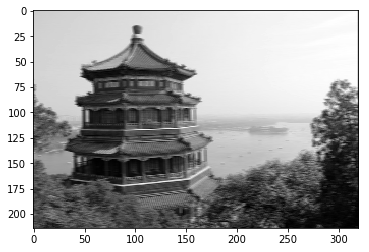

In [1]:
# see github link above for imports
import os
import re
import sys
import tarfile
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.contrib.slim.nets import inception
from sklearn.datasets import load_sample_image
from skimage.transform import resize
from collections import defaultdict
from datetime import datetime
from six.moves import urllib
from random import sample
# for resetting the graph
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
# reset the graph (always a good idea)
reset_graph()
# build mini-batch
china = load_sample_image("china.jpg")                # load china
flower = load_sample_image("flower.jpg")              # load flower
dataset = np.array([china, flower], dtype=np.float32) # assemble mini-batch
batch_size, height, width, channels = dataset.shape   # get parameters
# build filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) # size is 7x7, channels, and 2 filters (size of batch)
filters[:, 3, :, 0] = 1 # first filter [0] is zero apart from 1s in the middle vertical line (width=3)
filters[3, :, :, 1] = 1 # second filter [1] is zero apart from 1s in the middle horizontal line (height=3)
# tensorflow
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))     # placeholder to feed mini-batch
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME") # convolution step: 1 (stride between ...
                                                                          # ... instances), 2 (height), 2 (width), ...
                                                                          # ... and 1 (input channels)
with tf.Session() as sess:                                                # start session
    output = sess.run(convolution, feed_dict={X: dataset})                # compute output (apply convolution)
# list of images
images =[[china, output[0, :, :, 0], output[0, :, :, 1]],  # china: original, vertical filter, horizontal filter
         [flower, output[1, :, :, 0], output[1, :, :, 1]]] # flower: original, vertical filter, horizontal filter
# pick an image and plot it
image_choice = [0, 2]
print([image_choice[0], image_choice[1]])
plt.imshow(images[image_choice[0]][image_choice[1]], cmap="gray")
plt.show()

A few remarks on what just happened:
- "X" is the input mini-batch (a 4D-tensor).
- "filters" is the set of filters to apply (also a 4D-tensor).
- "strides" is a 4-element vector (1D-tensor) containing [instance step in batch, vertical step in input data, horizontal step in input data, step in input channel / feature map].
- "padding" must be "SAME" or "VALID". "SAME" pads as many 0s as required (as evenly as possible) around the borders of the input so all the input is covered. With "VALID", there is no padding. Then it may happen that not the entire inpute is covered. For example with input width 5, filter width 2, and stride 2, the last input will not be covered. Padding a 0 to the left or to the right would ensure complete coverage.

The filters do not need to be built manually - TensorFlow has us covered! For example, we can use "tf.layers.conv2d()" to have the filters initialized randomly. When training the CNN, useful filters would be learned. A demonstration with random initialization but without training looks as follows.

(2, 214, 320, 2)
[0, 2]


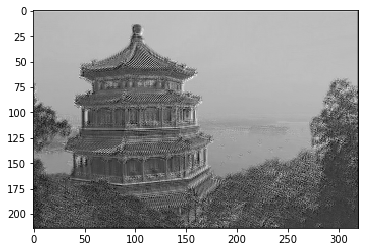

In [2]:
# reset the graph (always a good idea)
reset_graph()
# tensorflow
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32) # placeholder to feed mini-batch
conv = tf.layers.conv2d(X, filters=2, kernel_size=7,       # 2 filters (over X), kernel (=filter) has size 7x7 ...
                        strides=[2,2], padding="SAME")     # stride size 2 (vertical and horizontal), zero-padding
init = tf.global_variables_initializer()                   # global initializer
with tf.Session() as sess:                                 # start session
    init.run()                                             # run initializer
    output = sess.run(conv, feed_dict={X: dataset})        # compute output (apply convolution)
# list of images
print(output.shape)
images =[[china, output[0, :, :, 0], output[0, :, :, 1]],  # china: original, filter 1, filter 2
         [flower, output[1, :, :, 0], output[1, :, :, 1]]] # flower: original, filter 1, filter 2
# pick an image and plot it
image_choice = [0, 2]
print([image_choice[0], image_choice[1]])
plt.imshow(images[image_choice[0]][image_choice[1]], cmap="gray")
plt.show()

With the number of filters, their height and width, strides, and padding, CNNs have a lot of hyperparameters. One may use cross-validation to find the right hyperparameters. But this is still time-consuming so using an established model architecture (choice of hyperparameters) might be a good alternative to get started.
### Memory Requirements
page 364<br>
CNNs require a lot of RAM! Especially during training when all the intermediate values calculated in the forward pass need to be saved in order to be used in the reverse pass (backpropagation). Consider just one convolutional layer with 5x5 filters, 200 feature maps of size $150\times100$, with stride 1, and "SAME" padding. Let the input also have dimension $150\times100$, in 3 channels (RGB color). The number of weights will be $3\times5\times5\times200=15000$. Together with the 200 bias terms, these are 15200 parameters. This is actually little compared to a fully connected layer with $150\times100$ neurons (pixels), each connected to $3\times150\times100$ inputs would have 675 million parameters. Still, each $150\times100$ neurons in each of 200 feature maps need to compute a weighted sum of $3\times5\times5$ inputs. This means 225 million float multiplications! If each feature maps outputs are represented by 32-bit floats, this means $200\times150\times100\times32=96$ million bits (with $1024\times1024\times8$ bits = 1MB, this translates to 11.4MB), just for one instance! So a batch of 100 instances would need north of 1GB of RAM.<br>
For inference, the RAM issue is a bit relieved by the fact that each layer uses (in general, but not with skip connections as in the "ResNet" CNN architecture) only the previous layer as input so that (in general) only the values of two layers need to be kept in memory. This does not apply for training, when the entire forward pass needs to be kept in for the reverse pass. So the amount of RAM required is at least the amount of RAM to store all neurons' values in all layers.<br><br>
**Tip or Suggestion**<br>
If training crashes because of an out-of-memory error, you can try reducing the mini-batch size. Alternatively, you can try reducing dimensionality using a stride, or removing a few layers. Or you can try using 16-bit floats instead of 32-bit floats. Or you could distribute the CNN across multiple devices.
## Pooling Layer
page 365<br>
Pooling layers work very much like convolutional layers but instead of calculating the neurons' outputs based on a filter (i.e., on weights and biases), the output is simply the average or the maximum value of the input pixels / neurons. The point is simply to **subsample** the image (i.e., to shrink it) in order to reduce the number of parameters. 

(2, 213, 320, 3)
(427, 640, 3)
(427, 640, 3)
[0, 0]


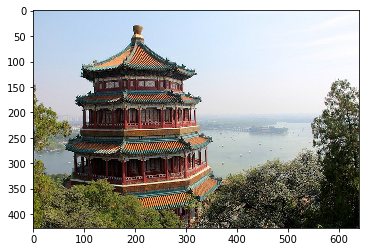

In [3]:
# reset the graph (always a good idea)
reset_graph()
# tensorflow
X = tf.placeholder(shape=(None, height, width, channels), dtype=tf.float32)       # placeholder to feed mini-batch
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID") # kernel and strides similar to ...
                                                                                  # ... "tf.nn.conv2d" above
with tf.Session() as sess:                              # start session
    output = sess.run(max_pool, feed_dict={X: dataset}) # compute output (apply convolution)
# list of images
print(output.shape)                                     # image, height, width, channel
print(china.shape)
print(flower.shape)
images =[[china, output[0, :, :, :]],                   # china: original, filter 1, filter 2
         [flower, output[1, :, :, :]]]                  # flower: original, filter 1, filter 2
# pick an image and plot it
image_choice = [0, 0]
print([image_choice[0], image_choice[1]])
plt.imshow(images[image_choice[0]][image_choice[1]], cmap="gray")
plt.show()

And that's already it with the building blocks of Convolutional Neural Networks. So let's investigate specific exammples!
## CNN Architectures
page 367<br>
Typical CNN archtectures have several convolutional layers followed by a pooling layer to reduce the dimension of the layer. But as the dimension shrinks, the number of feature maps per layer is usually increased so that more and more complex patterns can be recognized. Often, a fully connected layer or MLP (multilayer perceptron) with ReLU activation functions is stacked on top of the last convolution and feeds its output to a softmax function that assigns probabilities to the classes in question. There has been massive success and progress with CNNs over the past few years (see, e.g., http://image-net.org/ for results within the ILSVRC ImageNet challenge). Many intersting architectures have been developed. Some outstanding ones (mainly winners of the ILSVRC challenge) will be introduced in the sections below.
<br><br>
**Suggestion or Tip**<br>
A common mistake is to use convolution kernels that are too large. You can often get the same effect as a $9\times9$ kernel by stacking two $3\times3$ kernels on top of each other, for a lot less compute.<br><br>
#### Other Visual Tasks
There was stunning progress as well in other visual tasks such as object detection and localization, and image segmentation. In object detection and localization, the neural network typically outputs a sequence of bounding boxes around various objects in the image. For example, see Maxine Oquab et al.'s 2015 paper (https://goo.gl/ZKuDtv) that outputs a heat map for each object class, or Russell Stewart et al.'s 2015 paper (https://goo.gl/upuHl2) that uses a combination of a CNN to detect faces and a recurrent neural network to output a sequence of bounding boxes around them. In image segmentation, the net outputs an image (usually of the same size as the input) where each pixel indicates the class of the object to which the corresponding input pixel belongs. For example, check out Evan Shelhamer et al.'s 2015 paper (https://goo.gl/7ReZql).
### LeNet-5
page 368<br>
Possibly the most widely known CNN architecture, LeNet-5 was created in 1998 by Yann LeCunn for the MNIST dataset. The overall architecture is shown in the table below. Details can be found in the book and under the links related to LeNet above.

|Layer|Type|Maps|Size|Kernel size|Stride|Activation|
|-|-|-|-|-|-|-|
|Out|Fully Connected|-|10|-|-|RBF|
|F6|Fully Connected|-|84|-|-|tanh|
|C5|Convolution|120|1x1|5x5|1|tanh|
|S4|Avg Pooling|16|5x5|2x2|2|tanh|
|C3|Convolution|16|10x10|5x5|1|tanh|
|S2|Avg Pooling|6|14x14|2x2|2|tanh|
|C1|Convolution|6|28x28|5x5|1|tahn|
|In|Input|1|32x32|-|-|-|

### AlexNet
page 369<br>
The AlexNet CNN architecture won the 2012 ILSVRC challenge with a 17% top-5 error rate, way better then the second best architecture (26%). It was the first CNN to stack convolutional layers directly on top of each other. A modified version of AlexNet also won the challenge in 2013. The rough architecture is shown in the table below, further details can be found in the book (and under http://goo.gl/mWRBRp). An important invention that was introduced with AlexNet shall be pointed out, though: LRN, short for **local response normalization**, drives different feature maps away from each other, thus stimulating them to learn different features. When a neuron / pixel is strongly activated in one feature map, it is – by virtue of the normalization – a bit suppressed in neighboring feature maps. Equation 13-2 in the book shows how it works:
$$b_i=a_i\left(k+\alpha\sum_{j=j_{\text{low}}}^{j_{\text{high}}}a_j^2\right)^{-\beta}\quad\text{with}\quad\left\{\begin{array}jj_{\text{high}}=\text{min}(i+r/2,f_n-1)\\j_{\text{low}}=\text{max}(0,i-r/2)\end{array}\right.\quad,$$
where
- $b_i$ is the normalized output of the neuron located in feature map $i$, at some row $u$ and column $v$ (note that in this equation we consider only neurons located at this row and column, so $u$ and $v$ are not shwon).
- $a_i$ is the activation of that neuron after the ReLU step, but before normalization.
- $k,\,\alpha,\,\beta$, and $r$ are hyperparameters. $k$ is called the *bias*, and $r$ is called the *depth radius*.
- $f_n$ is the number of feature maps.

AlexNet uses $r=2$, $\alpha=0.00002$, $\beta=0.75$, and $k=1$. LRN can be implemented with tensorflow via "tf.nn.local_response_normalization()".

|Layer|Type|Maps|Size|Kernel size|Stride|Padding|Activation|
|-|-|-|-|-|-|-|-|
|Out|Fully Connected|-|1000|-|-|-|Softmax|
|F9|Fully Connected|-|4096|-|-|-|ReLU|
|F8|Fully Connected|-|4096|-|-|-|ReLU|
|C7|Convolution|256|13x13|3x3|1|SAME|ReLU|
|C6|Convolution|384|13x13|3x3|1|SAME|ReLU|
|C5|Convolution|384|13x13|3x3|1|SAME|ReLU|
|S4|Max Pooling|256|13x13|3x3|2|VALID|-|
|C3|Convolution|256|27x27|5x5|1|SAME|ReLU|
|S2|Max Pooling|96|27x27|3x3|2|VALID|-|
|C1|Convolution|96|55x55|11x11|4|SAME|ReLU|
|In|Input|3 (RGB)|274x274|-|-|-|-|

### GoogLeNet
page 371<br>
GoogLeNet won the 2014 ILSVRC challenge with a top-5 error rate below 7%. The main invention here is the **inception module** which allows the network to make more use of parameters and thus effectively needing less parameters: in fact, 10 times fewer parameters than AlexNet (about 6 million instead of about 60 million). The inception module uses
- three **parallel** convolutional layers of kernel size 1x1 and stride 1. In short, they consist of perceptrons that preprocess the input channels to the desired number of feature maps. However, it is not necessarily about the number but rather about the preprocessing with a perceptron (for each pixel).
- Another three parallel convolutional layers of **different kernel sizes** (1x1, 3x3, and 5x5) whose inputs are the outputs of the previous three parallel convolutons layers (with unit kernel sizes and strides). This allows the inception module to learn patterns of different sizes.
- In parallel to all that, there is a max-pooling layer of kernel size 3x3 and stride 1 that feeds a 1x1 concolutional layer also with stride 1 (the latter being similar to the three parallel preprocessing perceptron layers discribed first).
- All this leads to outputs of 3+1=4 parallel convolutional layers. These outputs are concatenated and fed to the next processing step.

**Warning / caution**<br>
The number of convolutional kernels for each convolutional layer is a hyperparameter. Unfortunately, this means that you have six more hyperparameters to tweak for every inception layer you add.<br><br>
Apart from its remarkable depth (in terms of layers) there is one more noteworthy feature of GoogLeNet: in a close-to-final step, a **globel average pooling** is applied: the pooling kernel for all channels has simply the size of the entire channel, thus producing only one value per layer (namely, the global average). This is basically a confidence map for a given class. This makes it unnecessary to have many fully connected layers stacked on top (one might be enough). Finally a softmax activation function is used to output class probabilities. Further details are in the book.
### ResNet
page 374<br>
With their *Residual Network* or *ResNet* (http://goo.gl/4puHU5), Kaiming He et al. won the 2015 ILSVRC challenge, achieving a top-5 error rate of under 3.6%. Apart from being extremely deep with 152 layer, it most notably introduced **skip connections** or **shortcut connections**. These feed an input to a layer also directly to the input of an activation function several layers further up, thus taking a *shortcut* or *skipping* layers. Now, instead of computing $h(x)$ where $x$ is the input, the skipped layers need to compute $h'(x)+x=h(x)$. This can be trained very fast, if $h(x)$ is close to $x$, which is often the case. Additionally, training of layers that would otherwise receive little variation in the inputs can be sped up significantly if a skip connection from further below shortcuts to an activation function just below these layers. Skipped layers and the corresponding skip connection form a **residual unit (RU)**.<br>
ResNet-152 contains first 3 RUs that output 256 maps, then 8 RUs outputting 512 maps, after that 36 RUs with 1024 maps, and finally 3 RUs with 2048 maps. Each RU contains three layer, thus adding up to 150 layers. Average pooling and a fully connected layer complete the 152 layers.<br>
Further mentions: The 2016 ILSVRC winners achieved an error of only 2.99%! And there are more interesting architectures, e.g., **VGGNet** and **Inception-v4** (http://goo.gl/QcMjXQ, and http://goo.gl/Ak2vBp, respectively).<br><br>
**General note**<br>
There is really nothing special about implementing the various CNN architectures we just discusssed. We saw earlier how to build all the individual building blocks, so now all you need is to assemble them to create the desired architecture. We will build a complete CNN in the upcoming exercises and you will find full working code in the Jupyter notebooks.<br>
#### TensorFlow Convolution Operations
TesorFlow also offers a few other kinds of convolutional layers:
- "tf.layers.conv1d()" creates a convolutionsl layer for 1D inputs. This is useful, for example, in natrual language processing, where a sentence may be represendtd as a 1D array of words, and the receptive field covers a few neghboring words.
- "tf.layers.conv3d()" creates a convolutional layer for 3D inputs, such as 3D PET scan.
- "tf.nn.atrous_conv2d()" creates an *atrous convolutional layer* ("à trous" is French for "with holes"). This is equivalent to using a regular convolutional layer with a filter dilated by inserting rows and columns of zeros (i.e., holes). For example, a 1x3 filter equal to [[1,2,3]] may be dilated wih a *dilation rate* of 4, resulting in a *dilated filter*  [[1, 0, 0, 0, 2, 0, 0, 0, 3]]. This allows the convolutional layer to have a larger receptive field at no computational price and using no extra parameters.
- "tf.layers.conv2d_transpose()" creates a *transpose convolutional layer*, sometimes called a *deconvolutional layer*, which *upsamples* an image. It does so by inserting zeros between the inputs, so you can think of this as a regular convolutional layer using a fractional stride. Upsampling is useful, for example, in image segmentation: in a typical CNN, feature maps get smaller and smaller as you progress through the network, so if you want to output an image of the same size as the input, you need an upsampling layer.
- "tf.nn.depthwise_conv2d()" creates a *depthwise convolutional layer* that applies every filter to every individual input channel independently. Thus, if there are $f_n$ filters and $f_{n'}$ input channels, then this will output $f_n\times f_{n'}$ feature maps.
- "tf.layers.separable_conv2d()" creates a *separable convolutional layer* that first acts like a depthwise convolutional layer, then applies a 1x1 convolutional layer to the resulting feature maps. This makes it possible to apply filters to arbitrary sets of inputs channels.

## Extra Material on MNIST
The below code is from the github link above. It is a simple CNN that performs very well on the MNIST dataset. An interesting command is "yield" (used to return results from the "shuffle_batch" function). How this keyword works is very nicely explained by the contribution of users "e-satis" and "XChikuX" on stackoverflow: https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do.<br><br>
To **visualize the graph of the CNN**, take the following four steps:
1. Create log directory ("logdir" in the code below) so that the file writer ("FileWriter", see next point) within the "init_and_save" node can write data to it. It is neat but not necessary that the file writer is part of the "init_and_save" node.
2. Here, the file writer is built in the construction phase. It obtains the model's graph via the command "tf.get_default_graph()". This can be different if the file writer is built during execution, see https://www.easy-tensorflow.com/tf-tutorials/basics/introduction-to-tensorboard.
3. Open a new terminal and navigate to the directory one level above the one that contains the folders with the logged data. In the following example, one must navigate to the directory "tf_logs" as it is one level above "13_CNNs", which contains the directory into which the file writer writes the logs.
4. When navigated to that directory, run "tensorboard --logdir *directory_above_logs*" in the terminal, where *directory_above_logs* is the directory that contains the directory into which the file writer has written a log file.
5. Open a new browser tab / window and go to http://localhost:6006.

An example where the file writer is built during execution follows further below. **Logging of a scalar quantity** is also demonstrated in that example.

In [4]:
### construction phase
# directory for saving the graph, see also the "file_writer" in the "init_and_save" node below
now = datetime.utcnow().strftime("%Y%m%d%H%M%S") # get current UTC time as a string with specified format
root_logdir = "tf_logs/13_CNNs"                  # this directory will in the same folder as this .ipynb notebook
logdir = "{}/run-{}/".format(root_logdir, now)   # folder with timestamp (inside the folder "tf_logs")
print(logdir)  
# input format
height = 28
width = 28
channels = 1
n_inputs = height * width
# convolutional layer 1: feature maps, kernel size, stride, padding (shared by all feature maps)
conv1_fmaps = 3
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"
# convolutional layer 2
conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"
# pooling layer uses the same number of maps / output channels as input channels / output channels of previous layer
pool3_fmaps = conv2_fmaps
# number of fully connected neurons
n_fc1 = 64
# number of class predictions after softmax
n_outputs = 10
# always a good idea
reset_graph()
# input layer: placeholders for features (X) and classes (y); reshape features into matrices with 3 channels per entry
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
# cnn layer 1: see details above + ReLU activation
conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad, activation=tf.nn.relu, name="conv1")
# cnn layer 2: see details above (stride=2 => now 14x14 images) + ReLU activation
conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad, activation=tf.nn.relu, name="conv2")
# pooling layer: max pooling from 2x2 square  with stride size 2 (=> 7x7 images) and "VALID" padding (no 0s added) ...
# ... and flatten the combined output of all max-pooled feature maps to a vector
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 7 * 7])
# fully connected layer with ReLU activation 64 outputs
with tf.name_scope("fc1"):
    fc1 = tf.layers.dense(pool3_flat, n_fc1, activation=tf.nn.relu, name="fc1")
# fully connected layer with 10 outputs, no default activation, followed by softmax
with tf.name_scope("output"):
    logits = tf.layers.dense(fc1, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")
# for training, use an Adam optimizer to reduce the cross entropy
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
# for evaluation, make predictions and check the accuracies
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
# initializer, saver, and file writer nodes
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()                               # variable initializer
    saver = tf.train.Saver()                                               # saver for the model
    file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())    # saver for the graph
#    file_writer = tf.summary.FileWriter(logdir, sess.graph)
### getting the data
# training, validation, and testing sets
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() # load training and testing data
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0            # training features
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0              # testing features
y_train = y_train.astype(np.int32)                                         # training labels
y_test = y_test.astype(np.int32)                                           # testing labels
X_valid, X_train = X_train[:5000], X_train[5000:]                          # subsplit training features and labels ...
y_valid, y_train = y_train[:5000], y_train[5000:]                          # ... validation and training instances
# batch size definition and shuffling
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))              # random permutation of all instances
    n_batches = len(X) // batch_size                     # number of batches
    for batch_idx in np.array_split(rnd_idx, n_batches): # loop through batches of the randomly permuted instances ...
        X_batch, y_batch = X[batch_idx], y[batch_idx]    # ... and get the according features and labels
        yield X_batch, y_batch    # use "yield" to avoid storing a lot of data in memory (generators vs. iterables)
### execution phase
# schedule
n_epochs = 10                     # number of epochs
batch_size = 100                  # batch size
# session
with tf.Session() as sess:        # session start
    #file_writer = tf.summary.FileWriter(logdir, sess.graph)
    init.run()                    # run initializer
    for epoch in range(n_epochs): # loop through epochs
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size): # feed batches to the algorithm ...
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})        # ... and thus train the algorithm
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})        # calculate the accuracy on the batch ...
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})           # ... and on the test set
        print(epoch, "Last batch accuracy:", acc_batch,                      # print the results to screen
              "Test accuracy:", acc_test)
        save_path = saver.save(sess, "./tf_logs/13_CNNs/myMNIST/my_mnist_model")

tf_logs/13_CNNs/run-20191005124801/
0 Last batch accuracy: 0.99 Test accuracy: 0.9682
1 Last batch accuracy: 0.97 Test accuracy: 0.9804
2 Last batch accuracy: 0.99 Test accuracy: 0.9763
3 Last batch accuracy: 0.99 Test accuracy: 0.9856
4 Last batch accuracy: 0.98 Test accuracy: 0.9869
5 Last batch accuracy: 1.0 Test accuracy: 0.9856
6 Last batch accuracy: 0.98 Test accuracy: 0.9877
7 Last batch accuracy: 0.99 Test accuracy: 0.9862
8 Last batch accuracy: 1.0 Test accuracy: 0.9879
9 Last batch accuracy: 1.0 Test accuracy: 0.9879


Based on the code from https://www.easy-tensorflow.com/tf-tutorials/basics/introduction-to-tensorboard, the following cell demonstrates (i) logging of a scalar quantity for visualization in TensorBoard and (ii) creation of a file writer inside the session.

In [5]:
now = datetime.utcnow().strftime("%Y%m%d%H%M%S") # get current UTC time as a string with specified format
root_logdir = "tf_logs/13_CNNs"                  # this directory will in the same folder as this .ipynb notebook
logdir = "{}/run-{}/".format(root_logdir, now)   # folder with timestamp (inside the folder "tf_logs")
print(logdir)  
reset_graph()
# create a scalar variable
x_scalar = tf.get_variable("x_scalar", shape=[], initializer=tf.truncated_normal_initializer(mean=0, stddev=1))
# create a scalar summary
x_summary = tf.summary.scalar(name="My_first_scalar_summary", tensor=x_scalar)
# initialize variables
init = tf.global_variables_initializer()
# launch a session
with tf.Session() as sess:
    # create a file writer inside the session (could also be outside, see above)
    file_writer = tf.summary.FileWriter(logdir, sess.graph)
    # loop over steps
    for step in range(100):
        # loop over several initializations of "x_scalar"
        sess.run(init)
        # run x_summary and add the result to the written file
        summary = sess.run(x_summary)
        file_writer.add_summary(summary, step)
# finish
print("Done with writing the scalar summary.")

tf_logs/13_CNNs/run-20191005124813/
Done with writing the scalar summary.


## Exercises
page 378
### 1.-6.
Solutions are shown in Appendix A of the book and in the separate notebook *ExercisesWithoutCode*.
### 7. Build your own CNN and try to achieve the highest possible accuracy on MNIST.

In [6]:
### everything github
# input layer
height = 28
width = 28
channels = 1
n_inputs = height * width
# first hidden layer: 32 feature maps of kernel size 3x3, stride 1, and "SAME" padding
conv1_fmaps = 32
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"
# second hidden layer: 64 feature maps of kernel size 3x3, stride 1, and "SAME" padding
conv2_fmaps = 64
conv2_ksize = 3
conv2_stride = 1
conv2_pad = "SAME"
conv2_dropout_rate = 0.25
# pooling layer: as many outputs layers as input layers
pool3_fmaps = conv2_fmaps
# fully connected layer: 128 neurons, 50% dropout probability
n_fc4 = 128
fc4_dropout_rate = 0.5
# outputs
n_outputs = 10
# always a good idea
reset_graph()
# inputs
with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width, channels])
    y = tf.placeholder(tf.int32, shape=[None], name="y")
    training = tf.placeholder_with_default(False, shape=[], name="training")
# layer 1 (convolution)
with tf.name_scope("conv1"):
    conv1 = tf.layers.conv2d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                             strides=conv1_stride, padding=conv1_pad,
                             activation=tf.nn.relu, name="conv1")
# layer 2 (convolution)
with tf.name_scope("conv2"):
    conv2 = tf.layers.conv2d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                             strides=conv2_stride, padding=conv2_pad,
                             activation=tf.nn.relu, name="conv2")
# layer 3 (pooling)
with tf.name_scope("pool3"):
    pool3 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
    pool3_flat = tf.reshape(pool3, shape=[-1, pool3_fmaps * 14 * 14])
    pool3_flat_drop = tf.layers.dropout(pool3_flat, conv2_dropout_rate, training=training)
# layer 4 (fully connected)
with tf.name_scope("fc4"):
    fc4 = tf.layers.dense(pool3_flat_drop, n_fc4, activation=tf.nn.relu, name="fc4")
    fc4_drop = tf.layers.dropout(fc4, fc4_dropout_rate, training=training)
# output layer
with tf.name_scope("output"):
    logits = tf.layers.dense(fc4, n_outputs, name="output")
    Y_proba = tf.nn.softmax(logits, name="Y_proba")
# training node
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)
# evaluation node
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
# initializer and saver node
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
### text on github:
# The get_model_params() function gets the model's state (i.e., the value of all the variables), and the ...
# ... restore_model_params() restores a previous state. This is used to speed up early stopping: instead of ...
# ... storing the best model found so far to disk, we just save it to memory. At the end of training, we roll ...
# ... back to the best model found.
def get_model_params():
    gvars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    return {gvar.op.name: value for gvar, value in zip(gvars, tf.get_default_session().run(gvars))}
def restore_model_params(model_params):
    gvar_names = list(model_params.keys())
    assign_ops = {gvar_name: tf.get_default_graph().get_operation_by_name(gvar_name + "/Assign")
                  for gvar_name in gvar_names}
    init_values = {gvar_name: assign_op.inputs[1] for gvar_name, assign_op in assign_ops.items()}
    feed_dict = {init_values[gvar_name]: model_params[gvar_name] for gvar_name in gvar_names}
    tf.get_default_session().run(assign_ops, feed_dict=feed_dict)
    pass
# training schedule
n_epochs = 1000                  # default is 1000
max_epoch = 2                    # own parameter to control maximum number of epochs, see if-statement below
batch_size = 50
iteration = 0
# early stopping
best_loss_val = np.infty         # stop early if this does not to improve for "max_checks_without_progress" checks
check_interval = 500             # default is 500; check "best_loss_val" after this number of batches
checks_since_last_progress = 0   # count the number of checks "best_loss_val" has not improved
max_checks_without_progress = 1  # stop early if "best_loss_val" did not improve over this many checks; default is 20
best_model_params = None         # the best model shall go here
# let the session begin!
with tf.Session() as sess:
    # initialize variables
    init.run()
    # loop over epochs
    for epoch in range(n_epochs):
        # for each epoch, make shuffled mini-batches and loop over them, feeding one at a time
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            iteration += 1       # over all epochs, count all the mini-batches (never reset)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True}) # actual training step
            # count the nubmer of times "best_loss_val" did not improve in a row or update it when it has improved
            if iteration % check_interval == 0:
                # first, calculate the loss on the validation set
                loss_val = loss.eval(feed_dict={X: X_valid, y: y_valid})
                # if it is lower (=better) than best_loss_val, copy it to best_loss_val and put the counter to 0 ...
                if loss_val < best_loss_val:
                    best_loss_val = loss_val
                    checks_since_last_progress = 0
                    best_model_params = get_model_params()
                # ... otherwise, do not update "best_loss_val" and increase the counter by 1
                else:
                    checks_since_last_progress += 1
        # calculate and print accuracies on the current batch and on the validation set
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print("Epoch {}, last batch accuracy: {:.4f}%, valid. accuracy: {:.4f}%, valid. best loss: {:.6f}".format(
            epoch, acc_batch * 100, acc_val * 100, best_loss_val))
        # stop early when there is no improvement
        if checks_since_last_progress > max_checks_without_progress:
            print("Early stopping!")
            break
        # own if-statement to control the maximum number of epochs
        if epoch is max_epoch:
            print("stopping at epoch", max_epoch)
            break
    # done with all the training but still in the session => retrieve the best model parameters (if they exist)
    if best_model_params:
        restore_model_params(best_model_params)
    # get serious: check the test set accuracy and print it
    acc_test = accuracy.eval(feed_dict={X: X_test[:7000], y: y_test[:7000]}) # avoid out-of-memory error by using ...
    print("Final accuracy on test set:", acc_test)                           # ... only a few instances
    # save the final model
    save_path = saver.save(sess, "./tf_logs/13_CNNs/Ex_7/my_mnist_model")

Epoch 0, last batch accuracy: 100.0000%, valid. accuracy: 98.5000%, valid. best loss: 0.061061
Epoch 1, last batch accuracy: 98.0000%, valid. accuracy: 98.7800%, valid. best loss: 0.047979
Epoch 2, last batch accuracy: 96.0000%, valid. accuracy: 98.4400%, valid. best loss: 0.043168
stopping at epoch 2
Final accuracy on test set: 0.9868571


### 8. Classifying large images using Inception v3.
- Download some images of various animals. Load them in Python, for example using the "matplotlib.image.mpimg.imread()" function or the "scipy.misc.imread()" function. Resize and/or crop them to 299x299 pixels, and ensure that they have just three channels (RGB), with no transparency channel.
- Download the latest pretrained Incpeption v3 model: the checkpoint is available at https://goo.gl/nxSQvl.
- Create the Inception v3 model by calling the "inception_v3()" function, as shown below. This must be done within an argument scope created by the "inception_v3_arg_scope()" function. Also, you must set "is_training=False" and "num_classes=1001" like so:

In [7]:
#from tensorflow.contrib.slim.nets import inception
#import tensorflow.contrib.slim as slim
#X = tf.pacehlder(tf.float32, shape=[None, 299, 299, 3], name="X")
#with slim.arg_scope(inception.inception_v3_arg_scope()):
#    logits

- Open a session and use the "Saver" to restore the pretrained model checkpoint you downloaded earlier.
- Run the model to classify the images you prepared. Display the top five predictions for each image, along with the estimated probability (the list of class names is available at https://goo.gl/brXRtZ). How accurate is the model?

All the code below is heavily inspired by the solution on GitHub.<br>
Thirty images (six each for five classes: camel, hyeana, koala, lion, and monkey) have been downloaded from the internet to the folder "animals_raw". They have any shape but all of them are .jpg files.

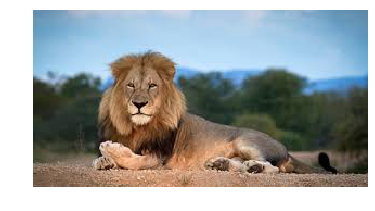

((163, 309, 3), 0, 255)

In [8]:
# show the raw images and their shape
width = 299
height = 299
channels = 3
test_image = mpimg.imread(os.path.join("datasets","chapter13","animals_raw","lion1.jpg"))[:, :, :channels]
plt.imshow(test_image)
plt.axis("off")
plt.show()
test_image.shape, np.min(test_image), np.max(test_image)

Preprocess the images to the correct shape and to the correct range of values.

In [9]:
# own code
def preprocess(image_v3):
    # value adjustment
    image_v3 = image_v3 - np.min(image_v3) # put minimum to 0
    image_v3 = image_v3 / np.max(image_v3) # put maximum to 1
    image_v3 = 2*image_v3 -1               # put minimum to -1 and maximum to +1
    # height adjustment
    height = len(image_v3)
    width = len(image_v3[1])
    if height < 299:
        height_add = np.zeros((299-height, width, 3))
        image_v3 = np.concatenate((image_v3, height_add), axis=0)
    height = np.max([height, 299])
    # width adjustment
    if width < 299:
        width_add = np.zeros((height, 299-width, 3))
        image_v3 = np.concatenate((image_v3, width_add), axis=1)
    # return an image of shape 299x299x3
    return (image_v3[:299, :299] + 1)/2
image = preprocess(test_image)
image.shape, np.min(image), np.max(image)

((299, 299, 3), 0.0, 1.0)

Show the preprocessed images.

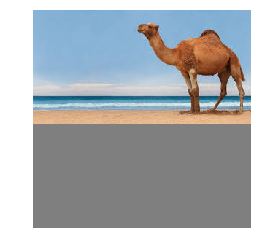

In [10]:
# completely own code
image_name = "camel5.jpg"
image = preprocess(mpimg.imread(os.path.join("datasets","chapter13","animals_raw",image_name))[:, :, :channels])
plt.imshow(image)
plt.axis("off")
plt.show()

Follow the instructions on the github website linked above. The ".txt" file with the classes has been obtained from the previously downloaded clone of the *entire* project.

In [11]:
### almost everything github
# model download (only if necessary)
TF_MODELS_URL = "http://download.tensorflow.org/models"
INCEPTION_V3_URL = TF_MODELS_URL + "/inception_v3_2016_08_28.tar.gz"
INCEPTION_PATH = os.path.join("datasets", "chapter13", "inception")
INCEPTION_V3_CHECKPOINT_PATH = os.path.join(INCEPTION_PATH, "inception_v3.ckpt")
def download_progress(count, block_size, total_size):
    percent = count * block_size * 100 // total_size
    sys.stdout.write("\rDownloading: {}%".format(percent))
    sys.stdout.flush()
def fetch_pretrained_inception_v3(url=INCEPTION_V3_URL, path=INCEPTION_PATH):
    if os.path.exists(INCEPTION_V3_CHECKPOINT_PATH):
        return
    else:
        os.makedirs(path, exist_ok=True)
        tgz_path = os.path.join(path, "inception_v3.tgz")
        urllib.request.urlretrieve(url, tgz_path, reporthook=download_progress)
        inception_tgz = tarfile.open(tgz_path)
        inception_tgz.extractall(path=path)
        inception_tgz.close()
        os.remove(tgz_path)
fetch_pretrained_inception_v3()
# class names
CLASS_NAME_REGEX = re.compile(r"^n\d+\s+(.*)\s*$", re.M | re.U)
def load_class_names():
    path = os.path.join("datasets", "chapter13", "inception", "imagenet_class_names.txt")
    with open(path, encoding="utf-8") as f:
        content = f.read()
        return CLASS_NAME_REGEX.findall(content)
class_names = ["background"] + load_class_names()
print("first few class names:\n")
class_names[:5]

Downloading: 100%first few class names:



['background',
 'tench, Tinca tinca',
 'goldfish, Carassius auratus',
 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 'tiger shark, Galeocerdo cuvieri']

Create a saver that allows us to recover the Inception v3 model.

In [12]:
# create a saver for restoring inception-v3; everything github
reset_graph()
X = tf.placeholder(tf.float32, shape=[None, 299, 299, 3], name="X")
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=False)
predictions = end_points["Predictions"]
saver = tf.train.Saver()
saver

Now select an image, preprocess it, show both the original and the preprocessed version, run a session in which Inception v3 is restored and applied to make predictions, and show these predictions.

<Figure size 432x288 with 0 Axes>

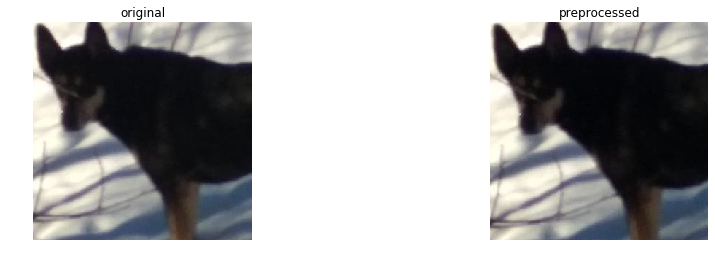

INFO:tensorflow:Restoring parameters from datasets/chapter13/inception/inception_v3.ckpt

 kelpie 

kelpie: 77.86%
miniature pinscher: 5.22%
German shepherd, German shepherd dog, German police dog, alsatian: 3.66%
Rottweiler: 2.43%
Doberman, Doberman pinscher: 1.06%


In [13]:
### own code
image_name = "dog5.jpg" # X = 1-6; "camelX", "hyenaX", "koalaX", "lionX", "monkeyX"
image = mpimg.imread(os.path.join("datasets","chapter13","animals_raw",image_name))[:, :, :channels]
test_image = preprocess(image)
# plot
fig = plt.figure()
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(image)
plt.axis("off")
plt.title("original")
plt.subplot(122)
plt.imshow(test_image)
plt.axis("off")
plt.title("preprocessed")
plt.show()
### github
# session run and prediction
X_test = test_image.reshape(-1, height, width, channels)
with tf.Session() as sess:
    saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    predictions_val = predictions.eval(feed_dict={X: X_test})
most_likely_class_index = np.argmax(predictions_val[0])
most_likely_class_index
print("\n", class_names[most_likely_class_index], "\n")
top_5 = np.argpartition(predictions_val[0], -5)[-5:]
top_5 = reversed(top_5[np.argsort(predictions_val[0][top_5])])
for i in top_5:
    print("{0}: {1:.2f}%".format(class_names[i], 100 * predictions_val[0][i]))

Simply amazing! Reusing readily trained models seems to be a very good idea for certain applications.
### 9. Transfer learning for large image classification.
- Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can just use an existing dataset, such as the flowers dataset (https://goo.gl/EgJVXZ) or MIT's places dataset (http://places.csail.mit.edu/) (requires registration, and it is huge).
- Write a preprocessing step that will resize and crop the image to 299x299, with some randomness for data augmentation.
- Using the pretrained Inception v3 model from the previous exercise, freeze all layers up to the bottleneck layer (i.e., the last layer before the output layer), and replace the output layer with the appropriate number of outputs for your new classification task (e.g., the flowers dataset has five mutually exclusive clases so the output layer must have five neurons and use the softmax activation function).
- Split your dataset into a training set and a test set. Train the model on the training set and evaluate it on the test set.

**Attention:** Everything works fine if exercise 8 is run before this exercise. Otherwise, there might be a possiblity that not everything works fine.

We start by **retrieving the data** from the (already existing) folder and collecting the **class names**.<br>
Apart from minor modifications, everything here is based on the GitHub solution.

In [14]:
# get the data, retrieve the classes, and print them
flowers_root_path = "./datasets/chapter13/flower_photos"                       # if required, download the flowers ...
flower_classes = sorted([dirname for dirname in os.listdir(flowers_root_path)  # ... dataset manually from ...
                  if os.path.isdir(os.path.join(flowers_root_path, dirname))]) # ... https://goo.gl/EgJVXZ and put ...
print(flower_classes)                                                          # ... it into flowers_root_path

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Use Python's `defaultdict` to make a dictionary that lists all relevant filepaths under the according class name.<br>
https://docs.python.org/3.3/library/collections.html#collections.defaultdict

Class: daisy


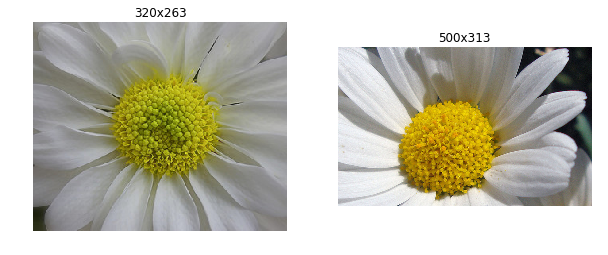

Class: dandelion


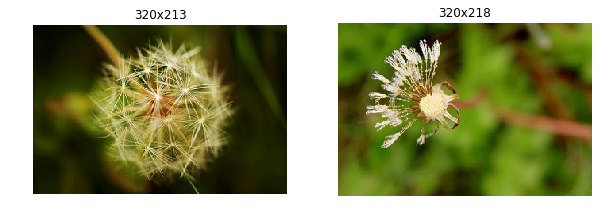

Class: roses


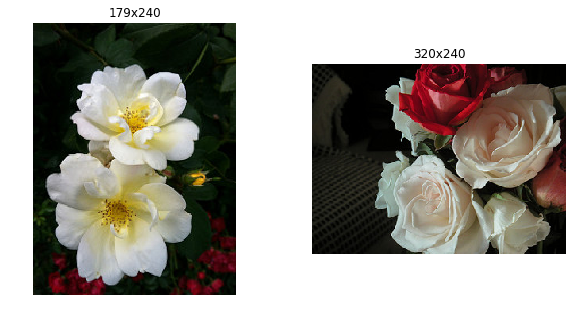

Class: sunflowers


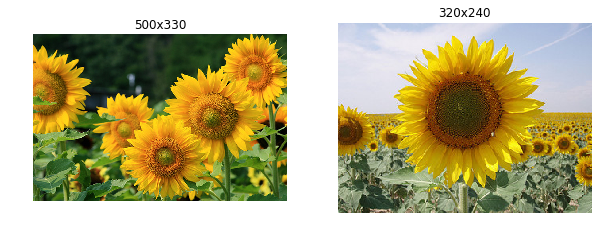

Class: tulips


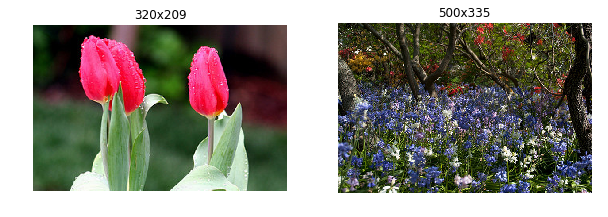

In [15]:
image_paths = defaultdict(list)            # make a dictionary
for flower_class in flower_classes:        # loop over the classes and  get the image directories
    image_dir = os.path.join(flowers_root_path, flower_class)
    for filepath in os.listdir(image_dir): # loop over the file paths (inside the current image directory)
        if filepath.endswith(".jpg"):      # include all jpg-paths in the dicitonary as entries to the according class
            image_paths[flower_class].append(os.path.join(image_dir, filepath))
for paths in image_paths.values():         # for each class, sort the paths
    paths.sort()
n_examples_per_class = 2                   # below, show 2 examples for each class
for flower_class in flower_classes:        # loop over classes, take two instances of each class, and plot them
    print("Class:", flower_class)
    plt.figure(figsize=(10,5))
    for index, example_image_path in enumerate(image_paths[flower_class][:n_examples_per_class]):
        example_image = mpimg.imread(example_image_path)[:, :, :channels]
        plt.subplot(100 + n_examples_per_class * 10 + index + 1) # specify the subplot position, e.g., 121 or 122
        plt.title("{}x{}".format(example_image.shape[1], example_image.shape[0]))
        plt.imshow(example_image)
        plt.axis("off")
    plt.show()                             # show the images

Preprocess the data and demonstrated the result.

/home/matthias/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


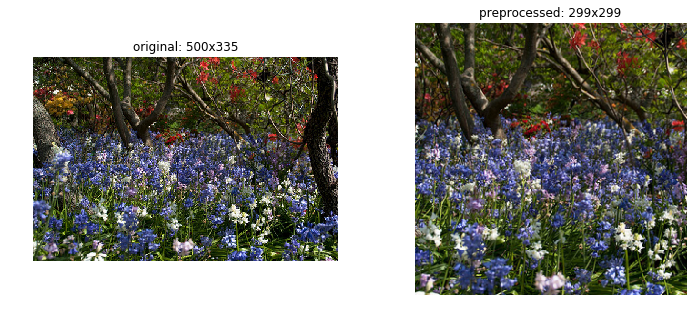

In [16]:
# data augmentation: zoom and crop with random parameters
def prepare_image(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    # find the largest bounding box with a target size ratio that fits within the image
    height = image.shape[0]
    width = image.shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = width if crop_vertically else int(height * target_image_ratio)
    crop_height = int(width / target_image_ratio) if crop_vertically else height
    # shrink bounding box by a random factor (divide dimensions by random number between 1.0 and 1.0+"max_zoom")
    resize_factor = np.random.rand() * max_zoom + 1.0
    crop_width = int(crop_width / resize_factor)
    crop_height = int(crop_height / resize_factor)
    # select bounding box's location on the image randomly
    x0 = np.random.randint(0, width - crop_width)
    y0 = np.random.randint(0, height - crop_height)
    x1 = x0 + crop_width
    y1 = y0 + crop_height
    # crop the image using the random bounding box
    image = image[y0:y1, x0:x1]
    # flip the image horizontally with 50% probability
    if np.random.rand() < 0.5:
        image = np.fliplr(image)
    # resize the image to target dimensions
    # scikit-image's "resize" transforms the image to floats ranging from 0.0 to 1.0
    image = resize(image, (target_width, target_height))
    # ensure the colors are represented as 32-bit floats
    return image.astype(np.float32)
# own code (subplot arguments "121" and "122" are really just numbers that are calculated elaborately on github)
prepared_image = prepare_image(example_image)
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.imshow(example_image)
plt.title("original: {}x{}".format(example_image.shape[1], example_image.shape[0]))
plt.axis("off")
plt.subplot(122)
plt.imshow(prepared_image)
plt.title("preprocessed: {}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

Below, data augmentation is demonstrated accordingly.

/home/matthias/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


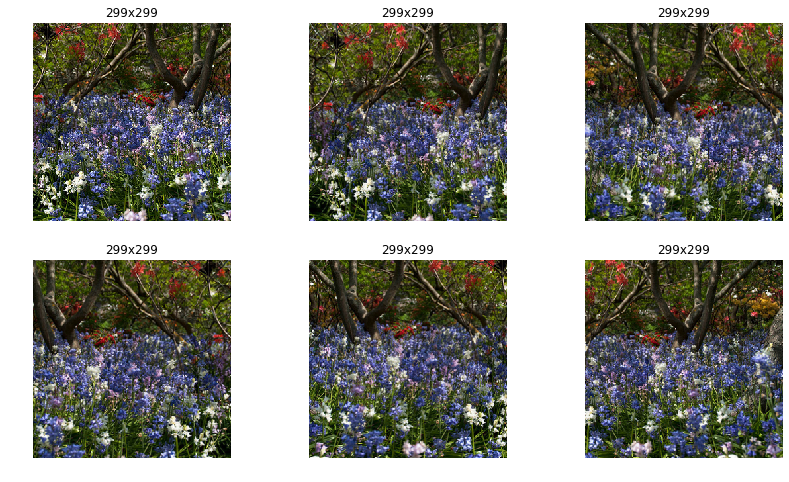

In [17]:
rows, cols = 2, 3           # rows and columns
plt.figure(figsize=(14, 8)) # figure
for row in range(rows):     # loop through rows ...
    for col in range(cols): # ... and columns
        # now prepare in image with the above function and place it in the according subplot
        prepared_image = prepare_image(example_image)
        plt.subplot(rows, cols, row * cols + col + 1) # automated placement in the right spot
        plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
        plt.imshow(prepared_image)
        plt.axis("off")
plt.show()                  # show the plot

In order to preprocess and augment the data "on the fly", it is useful to do the above steps with TensorFlow.

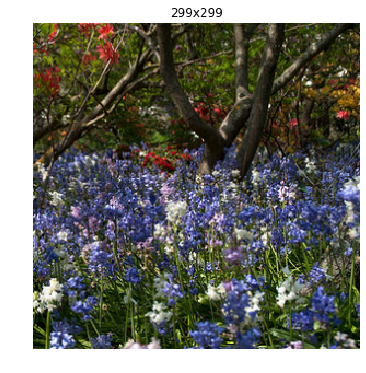

In [18]:
# define a functin that prepares (=reshape & augment) the input data
def prepare_image_with_tensorflow(image, target_width = 299, target_height = 299, max_zoom = 0.2):
    # zoom and crop the image randomly for data augmentation
    # find the largest bounding box with the target size ratio that fits within the image
    image_shape = tf.cast(tf.shape(image), tf.float32)
    height = image_shape[0]
    width = image_shape[1]
    image_ratio = width / height
    target_image_ratio = target_width / target_height
    crop_vertically = image_ratio < target_image_ratio
    crop_width = tf.cond(crop_vertically, lambda: width, lambda: height * target_image_ratio)
    crop_height = tf.cond(crop_vertically, lambda: width / target_image_ratio, lambda: height)
    # shrink this bounding box by a random factor (divide dimensions by a random number in [1, 1+"max_zoom"])
    resize_factor = tf.random_uniform(shape=[], minval=1.0, maxval=1.0 + max_zoom)
    crop_width = tf.cast(crop_width / resize_factor, tf.int32)
    crop_height = tf.cast(crop_height / resize_factor, tf.int32)
    # 3 is the number of channels
    box_size = tf.stack([crop_height, crop_width, 3])
    # crop the image using a random bounding box of the size "box_size"
    image = tf.random_crop(image, box_size)
    # flip the image horizontally with probability 0.5
    image = tf.image.random_flip_left_right(image)
    # "resize_bilinear" requires a 4D tensor (a batch of images) so we first expand the number of dimensions
    image_batch = tf.expand_dims(image, 0)
    # resize the image to the target dimensions; this function returns a float32 tensor
    image_batch = tf.image.resize_bilinear(image_batch, [target_height, target_width])
    # back to a single image, and scale the colors from 0.0 to 1.0
    image = image_batch[0] / 255
    return image
# a session is required to try out the function
reset_graph()
input_image = tf.placeholder(tf.uint8, shape=[None, None, 3])
prepared_image_op = prepare_image_with_tensorflow(input_image)
with tf.Session():
    prepared_image = prepared_image_op.eval(feed_dict={input_image: example_image})
# image prepared (with TensorFlow): now plot it
plt.figure(figsize=(6, 6))
plt.imshow(prepared_image)
plt.title("{}x{}".format(prepared_image.shape[1], prepared_image.shape[0]))
plt.axis("off")
plt.show()

Once more (as in exercise 8), we will recreate the Inception v3 model. This time, we also build a `training` placeholder to tell TensorFlow whether it shall train the model or not (default: no training).

In [19]:
# reset the graph
reset_graph()
X = tf.placeholder(tf.float32, shape=[None, height, width, channels], name="X")
training = tf.placeholder_with_default(False, shape=[])
with slim.arg_scope(inception.inception_v3_arg_scope()):
    logits, end_points = inception.inception_v3(X, num_classes=1001, is_training=training)
# make a saver
inception_saver = tf.train.Saver()
# try and error: look for the operation to which we attach the new output
print(logits.op.inputs[0])                           # nope
print(logits.op.inputs[0].op.inputs[0])              # nope
print(logits.op.inputs[0].op.inputs[0].op.inputs[0]) # yes, let's build on top of the dropout layer's output
print()
end_points

Tensor("InceptionV3/Logits/Conv2d_1c_1x1/BiasAdd:0", shape=(?, 1, 1, 1001), dtype=float32)
Tensor("InceptionV3/Logits/Conv2d_1c_1x1/Conv2D:0", shape=(?, 1, 1, 1001), dtype=float32)
Tensor("InceptionV3/Logits/Dropout_1b/cond/Merge:0", shape=(?, 1, 1, 2048), dtype=float32)



{'Conv2d_1a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_1a_3x3/Relu:0' shape=(?, 149, 149, 32) dtype=float32>,
 'Conv2d_2a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2a_3x3/Relu:0' shape=(?, 147, 147, 32) dtype=float32>,
 'Conv2d_2b_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_2b_3x3/Relu:0' shape=(?, 147, 147, 64) dtype=float32>,
 'MaxPool_3a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_3a_3x3/MaxPool:0' shape=(?, 73, 73, 64) dtype=float32>,
 'Conv2d_3b_1x1': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_3b_1x1/Relu:0' shape=(?, 73, 73, 80) dtype=float32>,
 'Conv2d_4a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/Conv2d_4a_3x3/Relu:0' shape=(?, 71, 71, 192) dtype=float32>,
 'MaxPool_5a_3x3': <tf.Tensor 'InceptionV3/InceptionV3/MaxPool_5a_3x3/MaxPool:0' shape=(?, 35, 35, 192) dtype=float32>,
 'Mixed_5b': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5b/concat:0' shape=(?, 35, 35, 256) dtype=float32>,
 'Mixed_5c': <tf.Tensor 'InceptionV3/InceptionV3/Mixed_5c/concat:0' shape=(?,

From the above output, it is apparently clear – see code on github – that the `'PreLogits'` endpoint is precisely what we need. So we use it.

In [20]:
prelogits = tf.squeeze(end_points["PreLogits"], axis=[1, 2]) # this is the input to what we construct next (on top)
n_outputs = len(flower_classes)                              # number of outputs
with tf.name_scope("new_output_layer"):                      # our new output layer
    flower_logits = tf.layers.dense(prelogits, n_outputs,name="flower_logits") # added layer uses "prelogits" as input
    Y_proba = tf.nn.softmax(flower_logits, name="Y_proba")   # softmax outputs probabilities
y = tf.placeholder(tf.int32, shape=[None])                   # label placeholder
# now, almost everything is basic (comments where not)
with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=flower_logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    flower_vars = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES, scope="flower_logits") # will be printed below
    training_op = optimizer.minimize(loss, var_list=flower_vars)
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(flower_logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()
# print the variables in "flower_vars" (see above), i.e., the variables of the added "flower_logits" (further above)
[v.name for v in flower_vars]

['flower_logits/kernel:0', 'flower_logits/bias:0']

Turn the data into batches so it can be fed to the *Inception v3* network.

In [21]:
# represent the different classes as different integers
flower_class_ids = {flower_class: index for index, flower_class in enumerate(flower_classes)}
print(flower_class_ids)
# construct new dataset
flower_paths_and_classes = []
# loop over classes and paths
for flower_class, paths in image_paths.items():
    # loop over path
    for path in paths:
        # append an instance's path and the integer corresponding to that instance
        flower_paths_and_classes.append((path, flower_class_ids[flower_class]))
# split the new dataset in test and training sets
test_ratio = 0.2
train_size = int(len(flower_paths_and_classes) * (1 - test_ratio))
np.random.shuffle(flower_paths_and_classes)
flower_paths_and_classes_train = flower_paths_and_classes[:train_size]
flower_paths_and_classes_test = flower_paths_and_classes[train_size:]
# print 3 instances (path and integer)
print(flower_paths_and_classes_train[:3])
# make a function that prepares batches
def prepare_batch(flower_paths_and_classes, batch_size):
    batch_paths_and_classes = sample(flower_paths_and_classes, batch_size)
    images = [mpimg.imread(path)[:, :, :channels] for path, labels in batch_paths_and_classes]
    prepared_images = [prepare_image(image) for image in images] # use "prepare_image()" for data augmentation
    X_batch = 2 * np.stack(prepared_images) - 1 # Inception v3 expects colors ranging from -1 to 1
    y_batch = np.array([labels for path, labels in batch_paths_and_classes], dtype=np.int32)
    return X_batch, y_batch
# prepare and print the shape and type of a batch (features and labels)
X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size=4)
print(X_batch.shape, X_batch.dtype, y_batch.shape, y_batch.dtype)

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}
[('./datasets/chapter13/flower_photos/daisy/19834392829_7d697871f6.jpg', 0), ('./datasets/chapter13/flower_photos/sunflowers/5957007921_62333981d2_n.jpg', 3), ('./datasets/chapter13/flower_photos/tulips/7166635566_ee240b5408_n.jpg', 4)]
(4, 299, 299, 3) float32 (4,) int32


/home/matthias/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Make a test batch.

In [22]:
X_test, y_test = prepare_batch(flower_paths_and_classes_test, batch_size=len(flower_paths_and_classes_test))
X_test.shape

/home/matthias/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(734, 299, 299, 3)

Train the network! We keep the lower parts frozen as they are already pretrained. Still, training will take quite some time because *Inception v3* is huge.

In [23]:
n_epochs = 2 # changed from default 10 for brevity
batch_size = 40
n_iterations_per_epoch = len(flower_paths_and_classes_train) // batch_size
with tf.Session() as sess:
    init.run()
    inception_saver.restore(sess, INCEPTION_V3_CHECKPOINT_PATH)
    for epoch in range(n_epochs):
        print("Epoch", epoch, end="")
        for iteration in range(n_iterations_per_epoch):
            print(".", end="")
            X_batch, y_batch = prepare_batch(flower_paths_and_classes_train, batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch, training: True}) # set "training" to "True"
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        print("\tLast batch accuracy:", acc_batch)
        save_path = saver.save(sess, "./tf_logs/13_CNNs/Ex_9/my_flowers_model")

INFO:tensorflow:Restoring parameters from datasets/chapter13/inception/inception_v3.ckpt
Epoch 0.

/home/matthias/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


........................................................................	Last batch accuracy: 0.525
Epoch 1.........................................................................	Last batch accuracy: 0.6


All that is left is to evaluate the model – via the accuracy – on a test batch. Also this takes a while.

In [24]:
n_test_batches = 10
X_test_batches = np.array_split(X_test, n_test_batches)
y_test_batches = np.array_split(y_test, n_test_batches)
with tf.Session() as sess:
    saver.restore(sess, "./tf_logs/13_CNNs/Ex_9/my_flowers_model")
    print("Computing final accuracy on the test set (this will take a while) ...")
    acc_test = np.mean([
        accuracy.eval(feed_dict={X: X_test_batch, y: y_test_batch})
        for X_test_batch, y_test_batch in zip(X_test_batches, y_test_batches)])
    print("Test accuracy:", acc_test)

INFO:tensorflow:Restoring parameters from ./tf_logs/13_CNNs/Ex_9/my_flowers_model
Computing final accuracy on the test set (this will take a while) ...
Test accuracy: 0.6264532


This is actually rather bad. But with enough training, the model would certainly perform better.
### 10. Go throguh TensorFlow's DeepDream tutorial (https://goo.gl/4b2s6g). It is a fun way to familiiarize yourself with various ways of visualizing the patterns learned by a CNN, and to generate art using Deep Learning.

This exercise shall be accomplished with the notebook "Tutorial on DeepDreaming with TensorFlow.ipynb".